Kindly include any necessary imports essential for the completion of this project:

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import mean_squared_error, r2_score

We will access our shared GitHub repository to read the csv, which is accessible to all of you.

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/xBuki/CS4661/main/HouseRentMisc/House_Rent_Dataset.csv")

In [24]:
print(df)
iris = load_iris()

       Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Ka

KNN Classifier:

In [25]:
features = df[['BHK', 'Rent', 'Size', 'Bathroom']]  
target = df['Point of Contact']

le = LabelEncoder()
target_numerical = le.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(features, target_numerical, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred_numerical = knn.predict(X_test)

y_pred_labels = le.inverse_transform(y_pred_numerical)

y_test_labels = le.inverse_transform(y_test)

accuracy = accuracy_score(y_test, y_pred_numerical)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

Contact Agent       0.75      0.71      0.73       307
Contact Owner       0.87      0.89      0.88       643

     accuracy                           0.83       950
    macro avg       0.81      0.80      0.80       950
 weighted avg       0.83      0.83      0.83       950



ROC Curve KNN

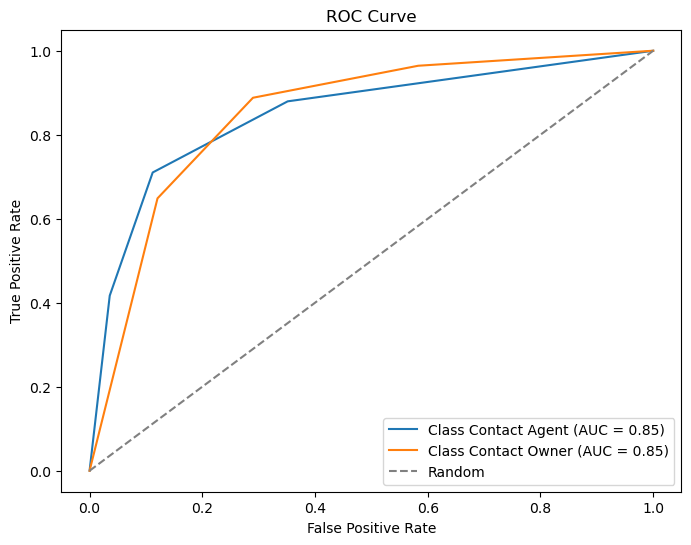

In [26]:
y_scores = knn.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=list(range(len(le.classes_))))

plt.figure(figsize=(8, 6))
for i in range(len(le.classes_)):
    if sum(y_test_bin[:, i]) > 0:
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Logistic Regression:

In [27]:
features = df[['BHK', 'Rent', 'Size', 'Bathroom']]  
target = df['Point of Contact']

le = LabelEncoder()
target_numerical = le.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(features, target_numerical, test_size=0.2, random_state=42)

logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict(X_test)

y_test_labels = le.inverse_transform(y_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test_labels, le.inverse_transform(y_pred)))

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

Contact Agent       0.75      0.61      0.67       307
Contact Owner       0.83      0.90      0.86       643

     accuracy                           0.81       950
    macro avg       0.79      0.75      0.77       950
 weighted avg       0.80      0.81      0.80       950



In [28]:
y_test_bin = label_binarize(y_test, classes=list(set(y_test)))

plt.figure(figsize=(8, 6))
for i in range(len(le.classes_)):
    if i in set(y_test):  
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

y_pred = logistic_reg.predict(X_test)
y_test_labels = le.inverse_transform(y_test)

ValueError: y should be a 1d array, got an array of shape (950, 3) instead.

<Figure size 800x600 with 0 Axes>

Linear Regression

In [29]:
le = LabelEncoder()
target_numerical = le.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(features, target_numerical, test_size=0.2, random_state=42)

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.71
R-squared: 0.19
